In [1]:
import sys
sys.path.append('../../')
import numpy as np

from rover_simulator.world import World
from rover_simulator.rover import BasicRover
from rover_simulator.history import SimpleHistory
from rover_simulator.navigation.controller import ConstantSpeedController
from rover_simulator.navigation.mapper import GridMapper
from rover_simulator.navigation.path_planner.grid_base import Dijkstra, Astar

In [2]:
world = World()
world.read_objects("../../rover_simulator/examples/environment_simple.txt")

rover_r = 0.5
start_pose = np.array([1.0, 1.0, 0.0])
goal_pos = np.array([13.0, 15.0])

mapper = GridMapper(
    grid_size=np.array([20, 20]),
    grid_width=0.5,
    sensor=None,
    known_obstacles=world.obstacles,
    rover_r=rover_r
)

path_planner = Astar(
    start_pose,
    goal_pos,
    mapper.map, 
    mapper.grid_width
)
path_planner.set_map(mapper)

rover = BasicRover(
    start_pose, rover_r,
    sensor=None,
    mapper=mapper,
    path_planner=path_planner,
    localizer=None,
    controller=ConstantSpeedController(w=np.pi/32),
    history=SimpleHistory()
)

world.append_rover(rover)

In [3]:
rover.waypoints = rover.path_planner.calculate_path()

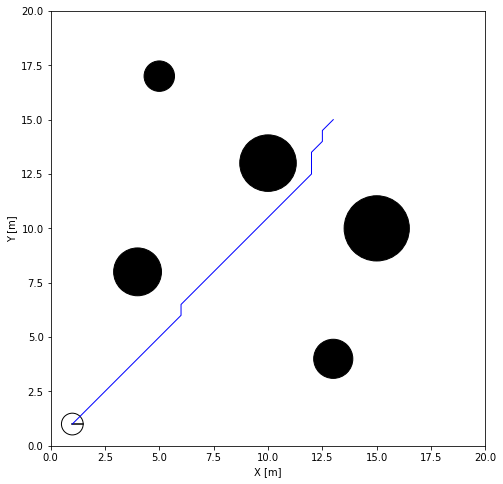

In [4]:
world.draw(xlim=[0, 20], ylim=[0, 20], enlarge_range=rover.r, draw_waypoints_flag=True)

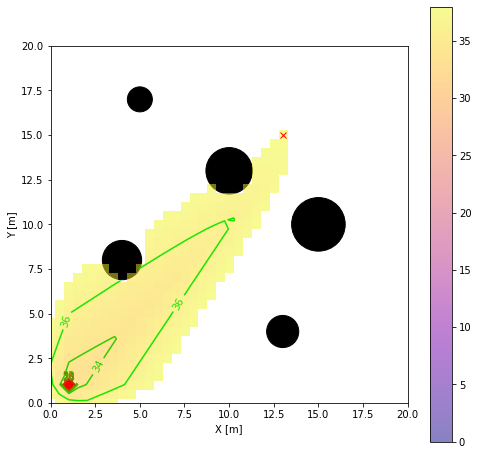

In [5]:
path_planner.draw(
    xlim=[0.0, 20.0],
    ylim=[0.0, 20.0],
    obstacles=world.obstacles, enlarge_range=rover.r,
    draw_map=True
)